In [21]:
import os
from collections import defaultdict
import numpy as np
import joblib
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

In [22]:
mask_path = "/home/sl636/inria/AerialImageDataset/retiled_train_masks/"
img_path = "/home/sl636/inria/AerialImageDataset/retiled_train_images/"

mask_val_path = "/home/sl636/inria/AerialImageDataset/retiled_val_masks/"
img_val_path = "/home/sl636/inria/AerialImageDataset/retiled_val_images/"

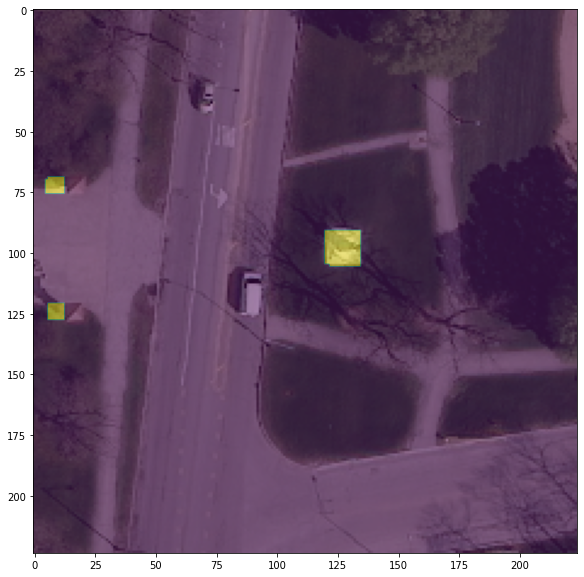

In [23]:
# Confirm that you can correctly look at an image with a mask
files = os.listdir(mask_path)
img = Image.open(mask_path+files[101])
base_img = Image.open(img_path+files[101])
plt.figure(figsize=(10,10))
plt.imshow(base_img)
plt.imshow(img, alpha=0.5)
plt.show()

In [30]:
# Create the transform needed 
trans = transforms.ToTensor()

In [24]:
# This function creates a generator that will generate a new masked
# example each time it is called

def get_masked_example():
	for fn in files:
		# Get the mask
		img = Image.open(mask_path+fn)
		base_img = Image.open(img_path+fn)
		yield img, base_img
		
ex_iter = get_masked_example()

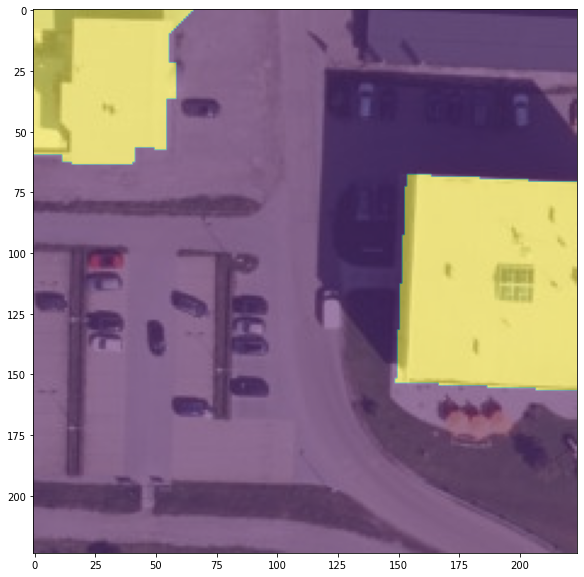

In [27]:
# Using the generator, you can run this cell multiple times to 
# look at examples
img, base = next(ex_iter)

plt.figure(figsize=(10,10))
plt.imshow(base)
plt.imshow(img, alpha=0.5)
plt.show()

In [29]:
# loop through masks, delete empty ones, save non-empty to npy file
# for quick loading
def save_mask_np(mask_path, train_test):
    files = os.listdir(mask_path)
    for i,fn in enumerate(files):
        try:    
            mask = Image.open(mask_path+fn)
            np_mask = np.array(mask)
            if np_mask.sum() > 0:
                np_mask = np_mask.copy()
                np_mask[np_mask>0]=1
                np.save(f"/home/sl636/inria/AerialImageDataset/np_{train_test}_masks/", np_mask)
            else:
                os.remove(mask_path+fn)
                print(f"Deleting mask {i}")
        except FileNotFoundError:
            pass

In [30]:

save_mask_np(mask_path, 'train')
save_mask_np(mask_val_path, 'val')

Deleting mask 3
Deleting mask 9
Deleting mask 17
Deleting mask 18
Deleting mask 20
Deleting mask 21
Deleting mask 24
Deleting mask 25
Deleting mask 27
Deleting mask 29
Deleting mask 30
Deleting mask 31
Deleting mask 34
Deleting mask 36
Deleting mask 37
Deleting mask 38
Deleting mask 39
Deleting mask 42
Deleting mask 44
Deleting mask 47
Deleting mask 48
Deleting mask 54
Deleting mask 60
Deleting mask 61
Deleting mask 63
Deleting mask 66
Deleting mask 67
Deleting mask 69
Deleting mask 75
Deleting mask 82
Deleting mask 84
Deleting mask 87
Deleting mask 90
Deleting mask 95
Deleting mask 97
Deleting mask 98
Deleting mask 105
Deleting mask 106
Deleting mask 118
Deleting mask 119
Deleting mask 120
Deleting mask 124
Deleting mask 125
Deleting mask 127
Deleting mask 130
Deleting mask 134
Deleting mask 137
Deleting mask 139
Deleting mask 140
Deleting mask 143
Deleting mask 145
Deleting mask 149
Deleting mask 151
Deleting mask 153
Deleting mask 156
Deleting mask 159
Deleting mask 160
Deleting mas